In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta

In [4]:
norwegian=pd.read_csv("../data/marine_data_2024_full_standard.csv")

In [5]:
norwegian['time']=pd.to_datetime(norwegian['time'])
print("total_duration:", norwegian['time'].max()-norwegian['time'].min())

total_duration: 365 days 23:45:00


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\Admin\AppData\Local\Temp\ipykernel_12852\1774567837.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=daily, x='time', y='wave_height_m', palette='pastel', ax=ax)


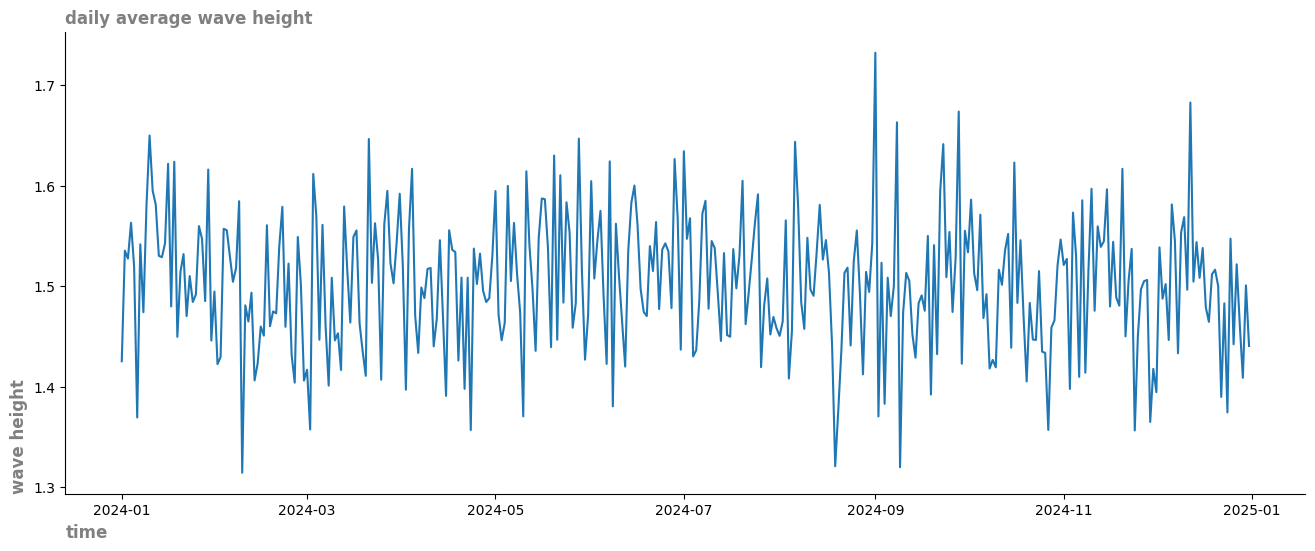

In [ ]:
# Calculate daily average wave height and plot it as a line chart
daily= norwegian.resample('D', on='time').mean()
daily=daily.reset_index()
fig, ax=plt.subplots(figsize=(16,6))
sns.lineplot(data=daily, x='time', y='wave_height_m', palette='pastel', ax=ax)
ax.set_title("daily average wave height", loc='left', color='gray', weight='bold')
ax.set_xlabel("time", loc='left', color='gray', weight='bold', fontsize=12)
ax.set_ylabel("wave height", loc='bottom', color='gray', weight='bold', fontsize=12)
ax.spines[['top','right']].set_visible(False)
fig.savefig("../figures/daily_avg_wave_height.png", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12852\3248765140.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=daily, x='time', y='sea_surface_temperature_C', palette='pastel', ax=ax)


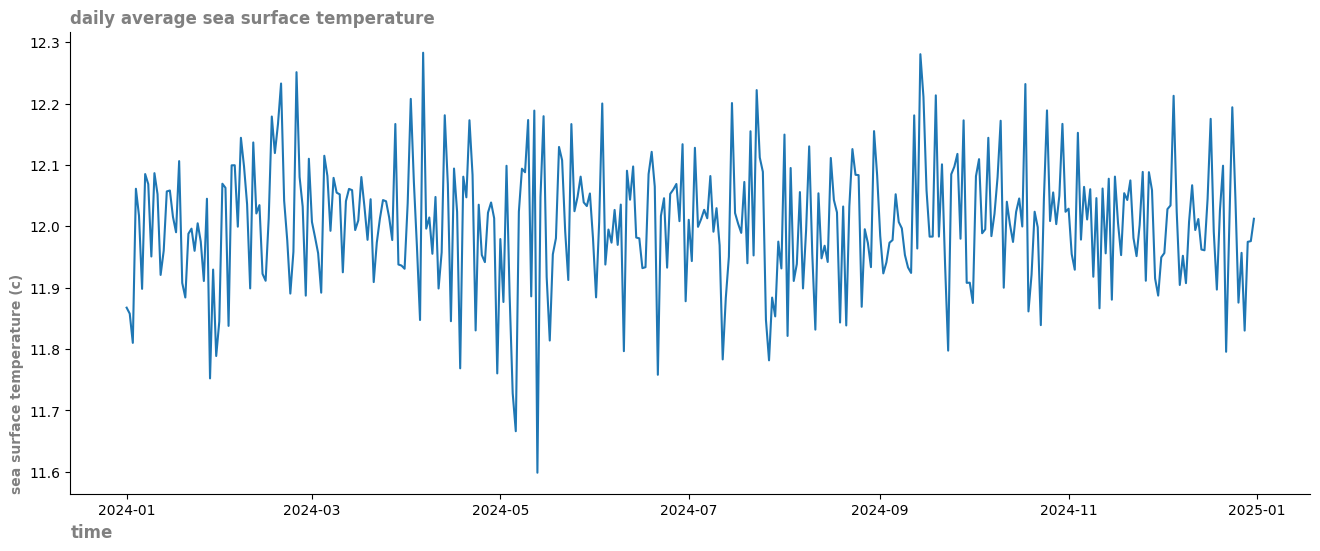

In [ ]:
# Calculate and plot daily average sea surface temperature as a line chart
fig, ax=plt.subplots(figsize=(16,6))
sns.lineplot(data=daily, x='time', y='sea_surface_temperature_C', palette='pastel', ax=ax)
ax.set_title("daily average sea surface temperature", loc='left', weight='bold', color='gray')
ax.set_xlabel("time", color='gray', loc='left',weight='bold', fontsize=12)
ax.set_ylabel("sea surface temperature (c)", color='gray', loc='bottom', weight='bold')
ax.spines[['top','right']].set_visible(False)
fig.savefig("../figures/daily_avg_sea_surface_tempreture_c.png",dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12852\2685154865.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly=norwegian.resample('M', on='time').mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12852\2685154865.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=monthly, x='time', y='wave_height_m', palette='pastel', ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

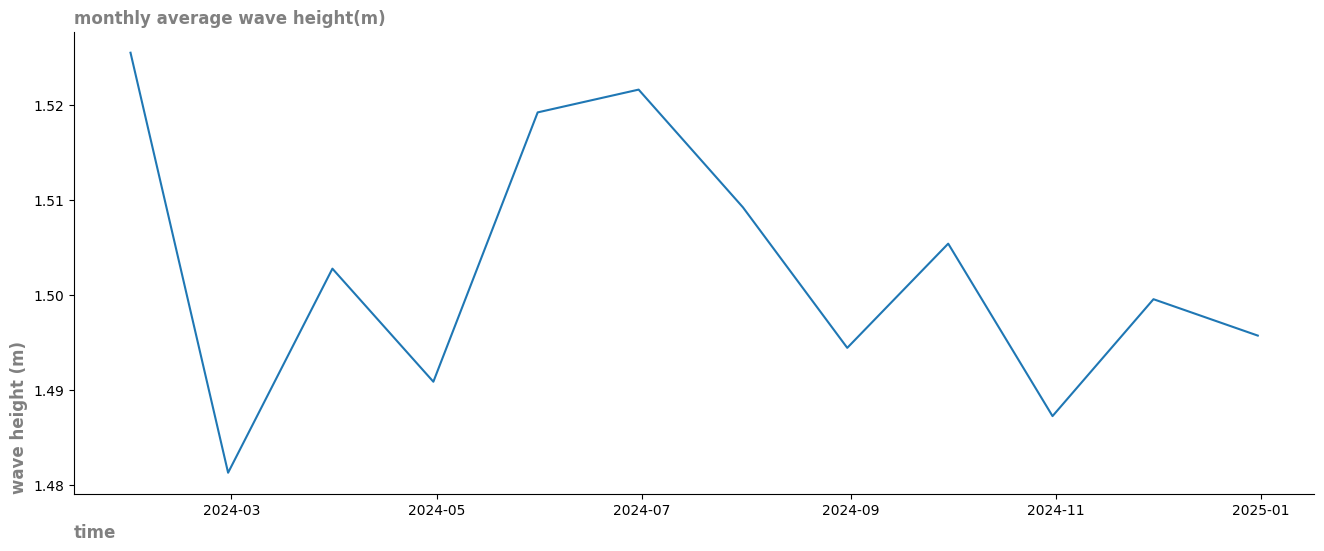

In [ ]:
# Calculate monthly average wave height and plot it as a line chart
monthly=norwegian.resample('M', on='time').mean()
monthly= monthly.reset_index()

fig, ax=plt.subplots(figsize=(16,6))
sns.lineplot(data=monthly, x='time', y='wave_height_m', palette='pastel', ax=ax)
ax.set_title("monthly average wave height(m)", loc='left', color='gray', weight='bold')
ax.set_xlabel("time", color='gray', loc='left', weight='bold', fontsize=12)
ax.set_ylabel("wave height (m)", color='gray', weight='bold', loc='bottom', fontsize=12)
ax.spines[['top', 'right']].set_visible(False)
fig.savefig("../figures/monthly_avg_wave_height.png", dpi=300)
plt.show

C:\Users\Admin\AppData\Local\Temp\ipykernel_12852\663315194.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=monthly, x='time', y='sea_surface_temperature_C', palette='pastel', ax=ax)


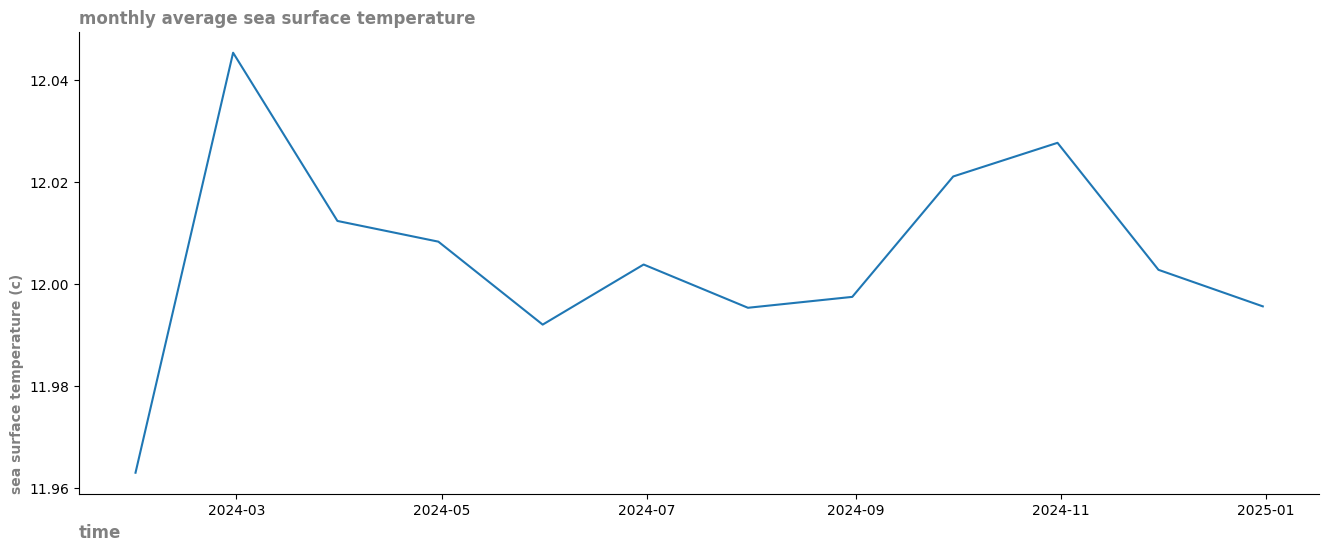

In [ ]:
# Calculate monthly average sea surface temperature and plot it as a line chart
fig, ax=plt.subplots(figsize=(16,6))
sns.lineplot(data=monthly, x='time', y='sea_surface_temperature_C', palette='pastel', ax=ax)
ax.set_title("monthly average sea surface temperature", loc='left', weight='bold', color='gray')
ax.set_xlabel("time", color='gray', loc='left',weight='bold', fontsize=12)
ax.set_ylabel("sea surface temperature (c)", color='gray', loc='bottom', weight='bold')
ax.spines[['top','right']].set_visible(False)
fig.savefig("../figures/monthly_avg_sea_surface_tempreture_c.png",dpi=300)
plt.show()

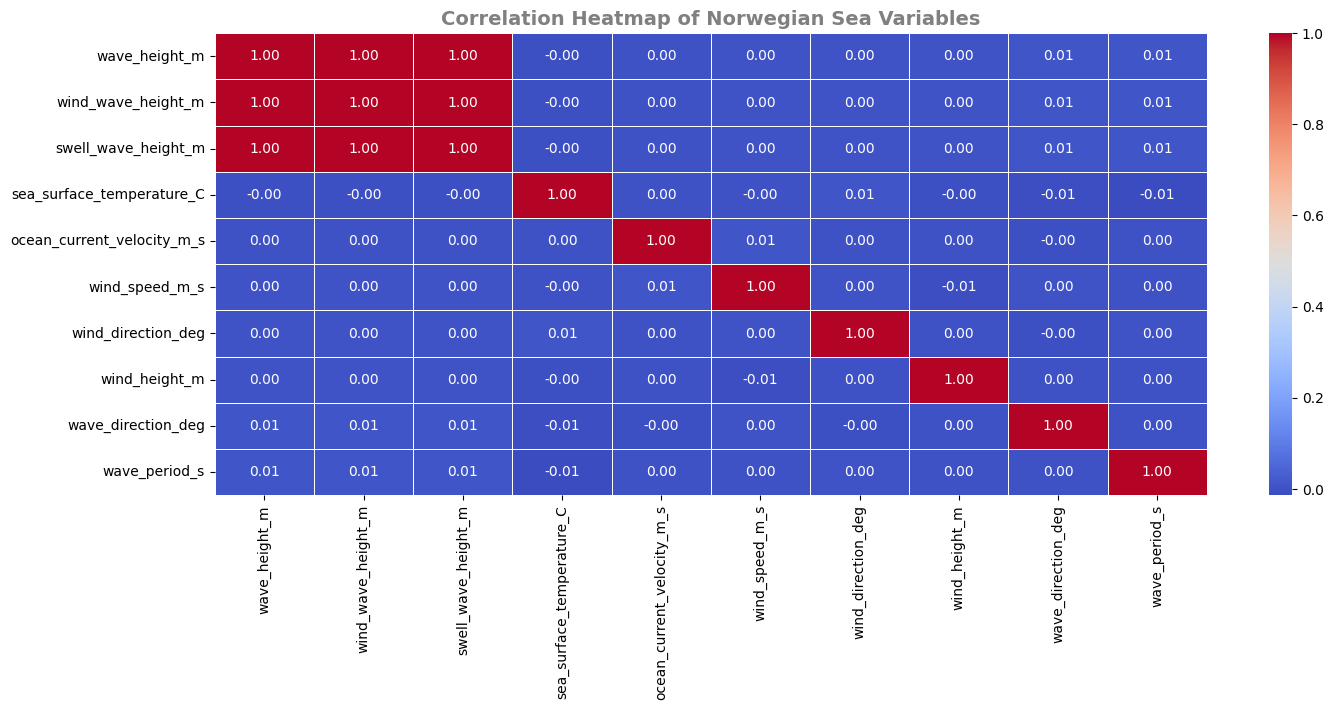

In [ ]:
# Compute correlation matrix for numeric variables and plot a heatmap
corr=norwegian.corr(numeric_only=True)
plt.figure(figsize=(16,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Norwegian Sea Variables", fontsize=14, weight='bold', color='gray')
plt.savefig("../figures/Correlation_Heatmap_NorwegianSea.png", dpi=300, bbox_inches="tight")

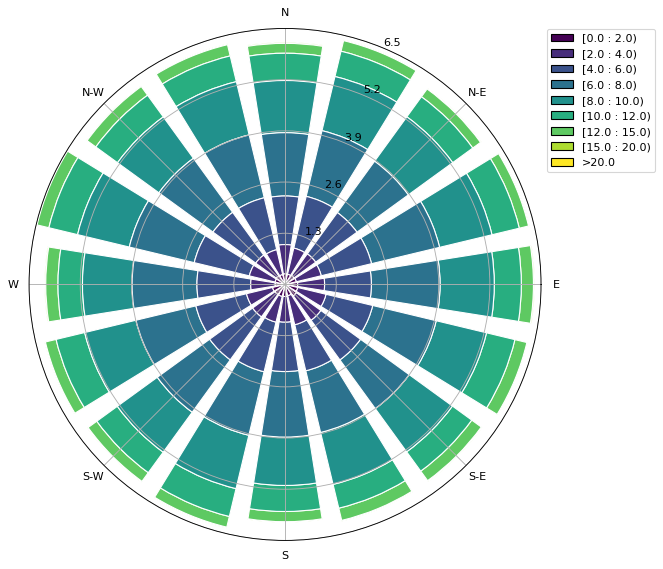

In [ ]:
# Create a wind rose plot showing the distribution of wind direction and speed
from windrose import WindroseAxes
directions= norwegian['wind_direction_deg']
speeds= norwegian['wind_speed_m_s']
ax= WindroseAxes.from_ax()
ax.bar(directions, speeds, bins=[0,2,4,6,8,10,12,15,20],
       normed=True,
       opening=0.8,
       edgecolor='white')

ax.set_legend(title="wind Speed (m/s)")
ax.legend( loc='upper left', bbox_to_anchor=(1, 1.01))
plt.savefig("../figures/wind_rose.png", dpi=300, bbox_inches='tight')
plt.show()

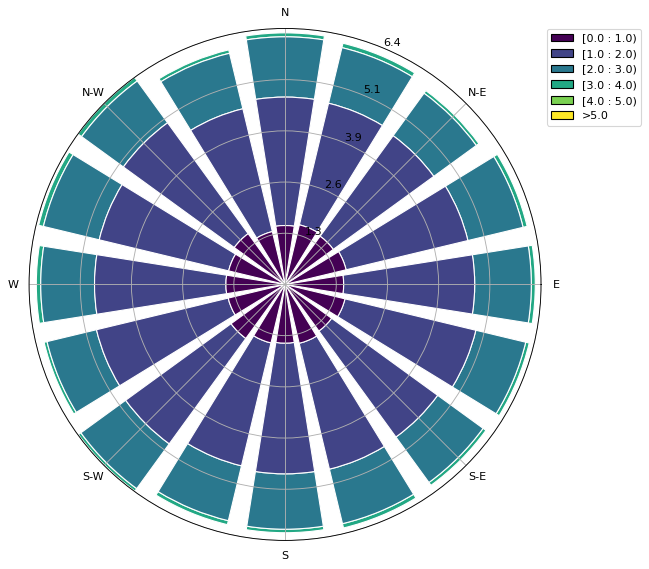

In [ ]:
# Create a wave rose plot showing the distribution of wave direction and height
wave_dir= norwegian['wave_direction_deg']
wave_height= norwegian["wave_height_m"]

ax= WindroseAxes.from_ax()

ax.bar(wave_dir, wave_height,
       bins=[0,1,2,3,4,5],
       normed=True,
       opening=0.8,
       edgecolor="white")

ax.set_legend(title="wave height (m)")
ax.legend( loc='upper left', bbox_to_anchor=(1, 1.01))
plt.savefig("../figures/wave_rose.png", dpi=300, bbox_inches='tight')
plt.show()

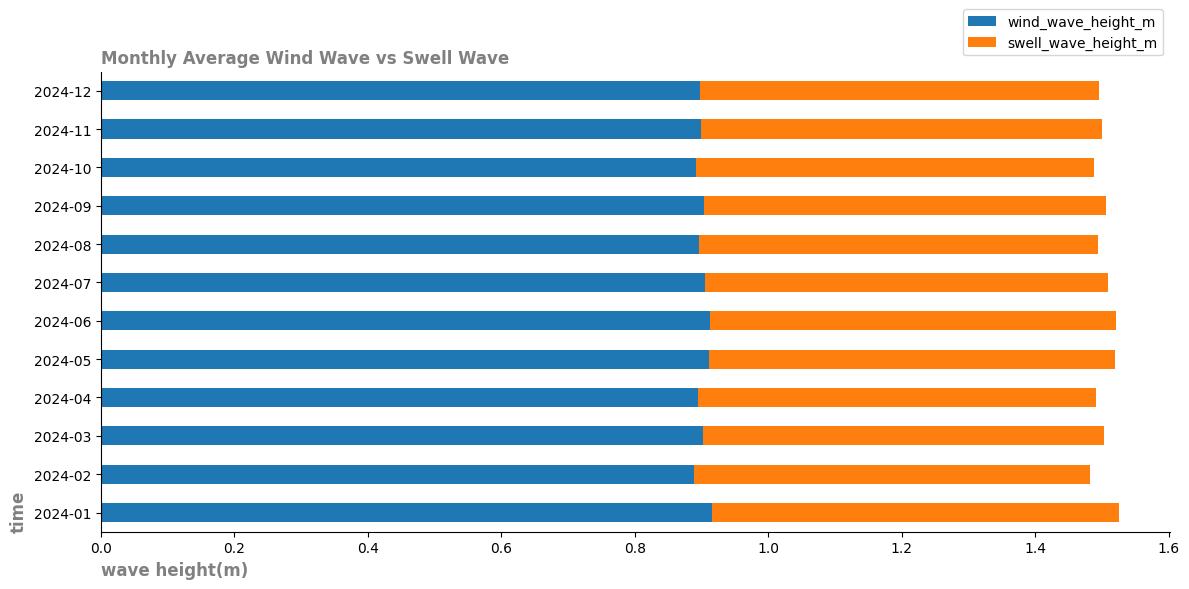

In [ ]:
# Compute monthly average of wind wave and swell wave heights and plot a stacked horizontal bar chart
norwegian['time'] = pd.to_datetime(norwegian['time'])
monthly2 = norwegian.groupby(norwegian['time'].dt.to_period('M'))[['wind_wave_height_m','swell_wave_height_m']].mean()
fig, ax = plt.subplots(figsize=(12,6))
monthly2.plot(kind='barh', stacked=True, ax=ax)
ax.set_title("Monthly Average Wind Wave vs Swell Wave", loc = 'left', color = 'gray', weight = 'bold')
ax.set_xlabel('wave height(m)', loc = 'left' , color = 'gray', weight='bold', fontsize=12)
ax.set_ylabel("time", loc = 'bottom', color='gray', weight= 'bold', fontsize=12)
ax.spines[['top','right']].set_visible(False)
ax.legend(loc='lower right', bbox_to_anchor=(1, 1.02))

plt.tight_layout()
fig.savefig("../figures/monthly avg wind wave vs swell wave.png",dpi=300)
plt.show()

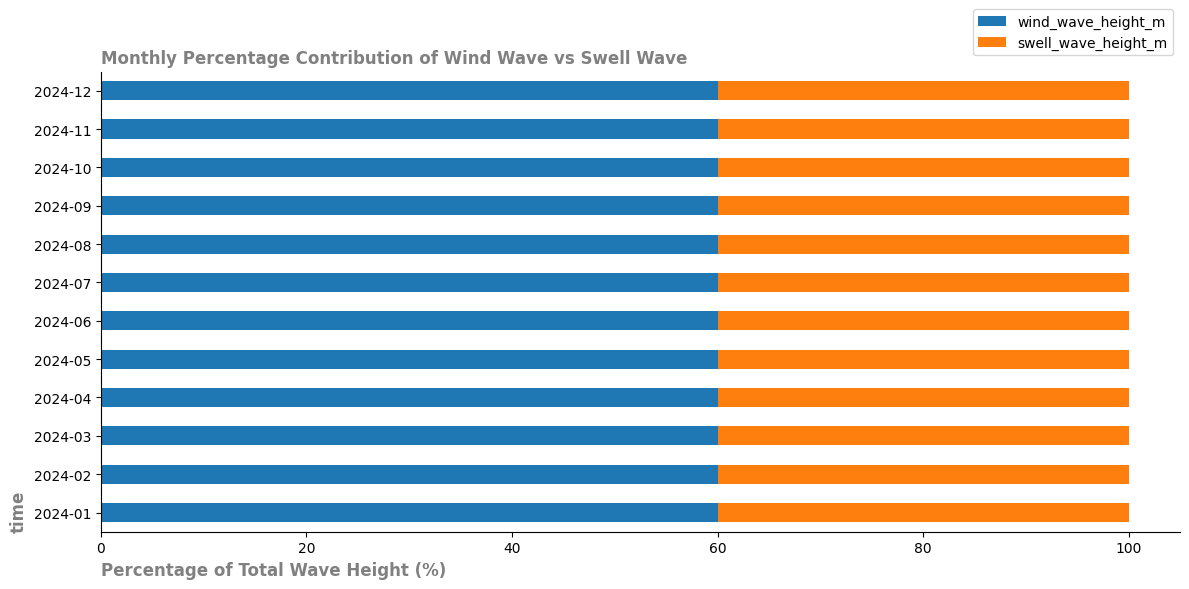

In [ ]:
# Calculate monthly percentage contribution of wind wave and swell wave heights and plot as a stacked horizontal bar chart
monthly_pct = monthly2.div(monthly2.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(12,6))
monthly_pct.plot(kind='barh', stacked=True, ax=ax)
ax.set_ylabel('time', color ='gray', weight='bold', loc='bottom', fontsize=12)
ax.set_xlabel('Percentage of Total Wave Height (%)', color ='gray', weight='bold', loc='left', fontsize=12)
ax.set_title('Monthly Percentage Contribution of Wind Wave vs Swell Wave',color ='gray', weight='bold', loc='left')
ax.legend( loc='lower right', bbox_to_anchor=(1, 1.02))
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
fig.savefig("../figures/Monthly Percentage Contribution of Wind Wave vs Swell Wave.png",dpi=300)
plt.show()

In [ ]:
# Compute and print correlation between wind speed and wind wave / swell wave heights

r_wind_wave = norwegian['wind_speed_m_s'].corr(norwegian['wind_wave_height_m'])
r_swell_wave = norwegian['wind_speed_m_s'].corr(norwegian["swell_wave_height_m"])

print(f"correlation wind ↔ wind wave: {r_wind_wave:.3f}")
print(f"correlation wind ↔ swell wave: {r_swell_wave:.3f}")


correlation wind ↔ wind wave: 0.002
correlation wind ↔ swell wave: 0.002


In [ ]:
# Fit simple linear regression models to assess how wind speed explains wind wave and swell wave heights, then print R² scores
from sklearn.linear_model import LinearRegression
x = norwegian['wind_speed_m_s'].values.reshape(-1,1)
y = norwegian['wind_wave_height_m'].values

model = LinearRegression().fit(x,y)
r2_wind_wave = model.score(x,y)

y_swell = norwegian['swell_wave_height_m'].values
model2 = LinearRegression().fit(x, y_swell)
r2_swell_wave = model2.score(x, y_swell)

print(f"R² Wind ↔ Wind Wave: {r2_wind_wave:.3f}")
print(f"R² Wind ↔ Swell Wave: {r2_swell_wave:.3f}")


R² Wind ↔ Wind Wave: 0.000
R² Wind ↔ Swell Wave: 0.000


In [ ]:
# Compute lagged correlation between wind speed and wind wave height, and identify the lag with maximum correlation
wind = norwegian['wind_speed_m_s'].values
wave = norwegian['wind_wave_height_m'].values
lags = np.arange(-96,96)
corrs = [np.corrcoef(wave[max(0,lag):min(len(wave),len(wave)+lag)], 
                     wind[max(0,-lag):min(len(wind),len(wind)-lag)])[0,1] for lag in lags]
best_lag = lags[np.argmax(np.abs(corrs))]
max_corr = corrs[np.argmax(np.abs(corrs))]
print(f"Max correlation = {max_corr:.3f} at lag = {best_lag}")


Max correlation = 0.015 at lag = 60


In [ ]:
# Fit linear regression models to examine how ocean current velocity and sea surface temperature (SST) explain wind wave and swell wave heights, then print R² scores
from sklearn.linear_model import LinearRegression

X_current = norwegian['ocean_current_velocity_m_s'].values.reshape(-1,1)
X_temp = norwegian['sea_surface_temperature_C'].values.reshape(-1,1)
y_wind_wave = norwegian['wind_wave_height_m'].values
y_swell_wave = norwegian['swell_wave_height_m'].values

model_wind_current = LinearRegression().fit(X_current, y_wind_wave)
r2_wind_current = model_wind_current.score(X_current, y_wind_wave)

model_swell_current = LinearRegression().fit(X_current, y_swell_wave)
r2_swell_current = model_swell_current.score(X_current, y_swell_wave)

model_wind_temp = LinearRegression().fit(X_temp, y_wind_wave)
r2_wind_temp = model_wind_temp.score(X_temp, y_wind_wave)

model_swell_temp = LinearRegression().fit(X_temp, y_swell_wave)
r2_swell_temp = model_swell_temp.score(X_temp, y_swell_wave)

print(f"R² Wind Wave ↔ Ocean Current: {r2_wind_current:.3f}")
print(f"R² Swell Wave ↔ Ocean Current: {r2_swell_current:.3f}")
print(f"R² Wind Wave ↔ SST: {r2_wind_temp:.3f}")
print(f"R² Swell Wave ↔ SST: {r2_swell_temp:.3f}")

R² Wind Wave ↔ Ocean Current: 0.000
R² Swell Wave ↔ Ocean Current: 0.000
R² Wind Wave ↔ SST: 0.000
R² Swell Wave ↔ SST: 0.000


C:\Users\Admin\AppData\Local\Temp\ipykernel_12852\3274539839.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=daily, x='time', y='wave_period_s', palette='pastel', ax=ax)


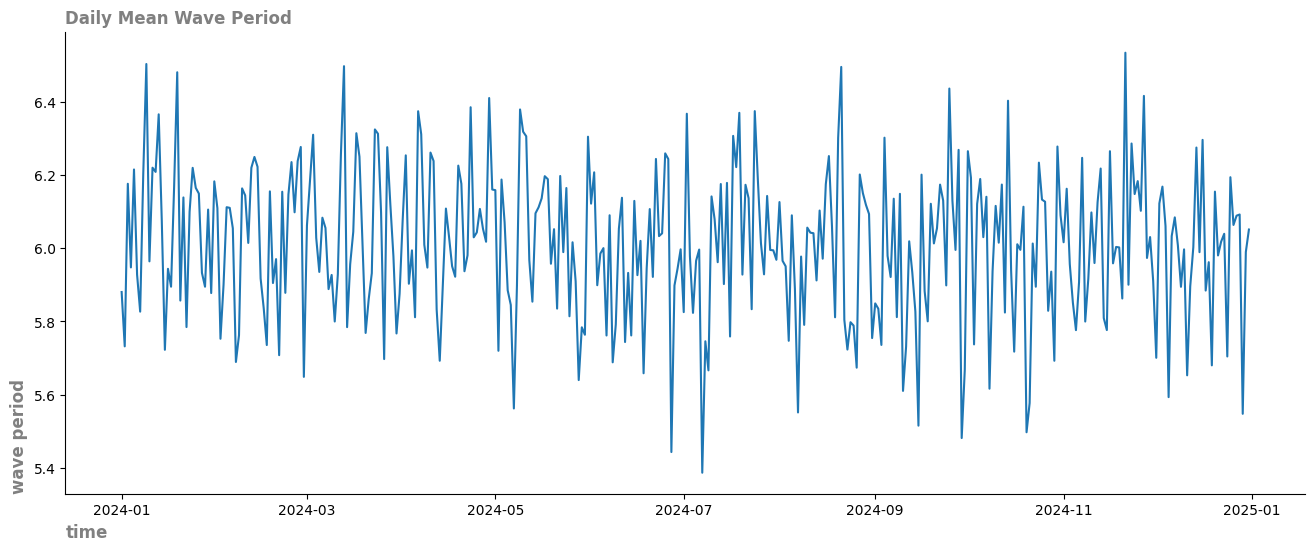

In [ ]:
# Calculate daily mean wave period and plot it as a line chart
daily= norwegian.resample('D', on='time').mean()
daily=daily.reset_index()
fig, ax=plt.subplots(figsize=(16,6))
sns.lineplot(data=daily, x='time', y='wave_period_s', palette='pastel', ax=ax)
ax.set_title("Daily Mean Wave Period", loc='left', color='gray', weight='bold')
ax.set_xlabel("time", loc='left', color='gray', weight='bold', fontsize=12)
ax.set_ylabel("wave period", loc='bottom', color='gray', weight='bold', fontsize=12)
ax.spines[['top','right']].set_visible(False)
fig.savefig("../figures/Daily Mean Wave Period.png", dpi=300)
plt.show()

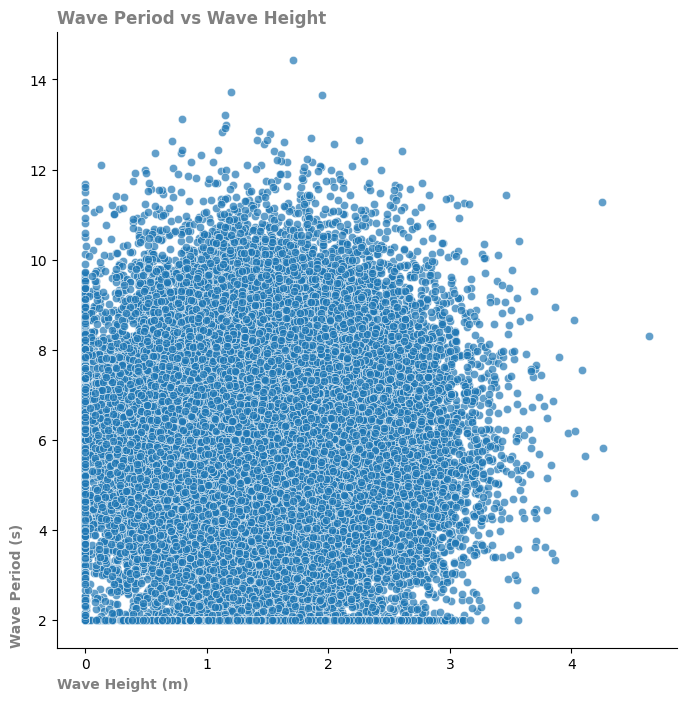

Correlation Wave Height ↔ Wave Period: 0.008


In [ ]:
# Plot scatter of wave period vs wave height and compute their correlation
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='wave_height_m', y='wave_period_s', data=norwegian, alpha= 0.7)
ax.set_xlabel('Wave Height (m)', color='gray', loc = 'left', weight = 'bold', fontsize=10)
ax.set_ylabel('Wave Period (s)',color='gray', loc = 'bottom', weight = 'bold', fontsize=10)
ax.set_title('Wave Period vs Wave Height', loc = 'left', color= 'gray', weight= 'bold')
ax.spines[['top', 'right']].set_visible(False)
fig.savefig("../figures/Wave Period vs Wave Height.png", dpi=300)
plt.show()
corr = norwegian['wave_height_m'].corr(norwegian['wave_period_s'])
print(f"Correlation Wave Height ↔ Wave Period: {corr:.3f}")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12852\3369939978.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=daily, x='time', y='ocean_current_velocity_m_s', palette='pastel', ax=ax)


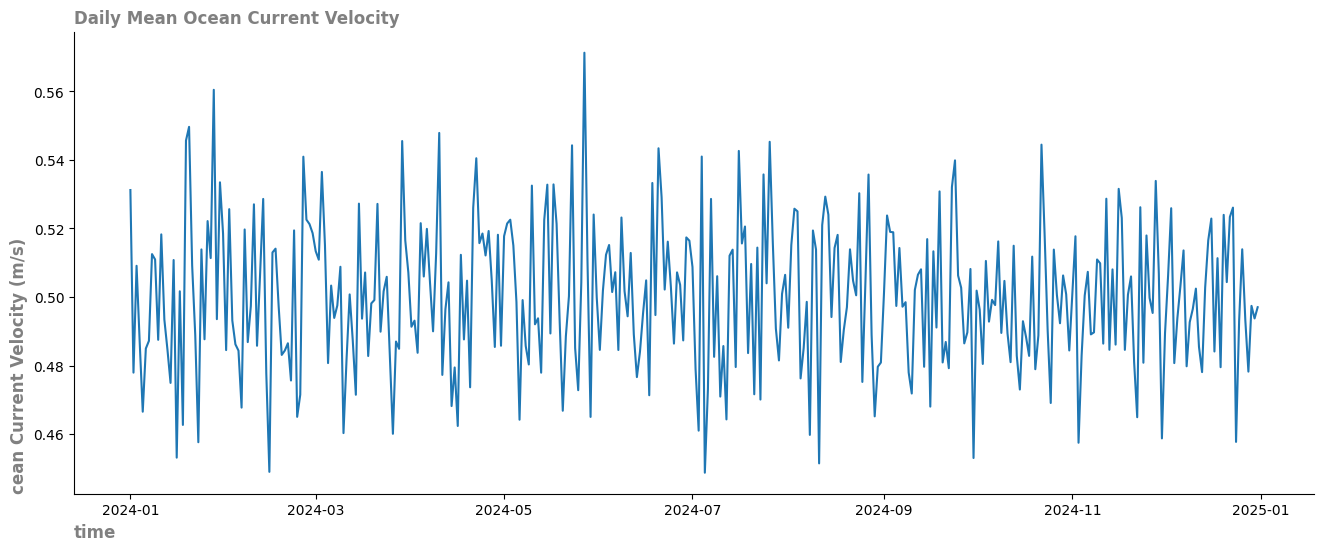

In [ ]:
# Calculate daily mean ocean current velocity and plot it as a line chart

daily= norwegian.resample('D', on='time').mean()
daily=daily.reset_index()
fig, ax=plt.subplots(figsize=(16,6))
sns.lineplot(data=daily, x='time', y='ocean_current_velocity_m_s', palette='pastel', ax=ax)
ax.set_title("Daily Mean Ocean Current Velocity", loc='left', color='gray', weight='bold')
ax.set_xlabel("time", loc='left', color='gray', weight='bold', fontsize=12)
ax.set_ylabel("cean Current Velocity (m/s)", loc='bottom', color='gray', weight='bold', fontsize=12)
ax.spines[['top','right']].set_visible(False)
fig.savefig("../figures/Daily Mean Ocean Current Velocity.png", dpi=300)
plt.show()

In [ ]:
# machine learning

norwegian['time'] = pd.to_datetime(norwegian['time'])
norwegian['month'] = norwegian['time'].dt.month
norwegian['day'] = norwegian['time'].dt.day

def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

norwegian['season'] = norwegian['month'].apply(get_season)

norwegian['wind_wave_height_lag1'] = norwegian['wind_wave_height_m'].shift(1)
norwegian['wind_speed_lag1'] = norwegian['wind_speed_m_s'].shift(1)

In [51]:
from sklearn.preprocessing import StandardScaler

features = ['wind_wave_height_m','swell_wave_height_m','wind_speed_m_s','ocean_current_velocity_m_s','wave_period_s']
scaler = StandardScaler()
norwegian_scaled = norwegian.copy()
norwegian_scaled[features] = scaler.fit_transform(norwegian[features])

In [53]:
features = ['wind_wave_height_m', 'swell_wave_height_m', 'wind_speed_m_s', 'ocean_current_velocity_m_s', 'wave_period_s']
X_cluster = norwegian_scaled[features]

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster)
norwegian_scaled['cluster'] = kmeans.labels_

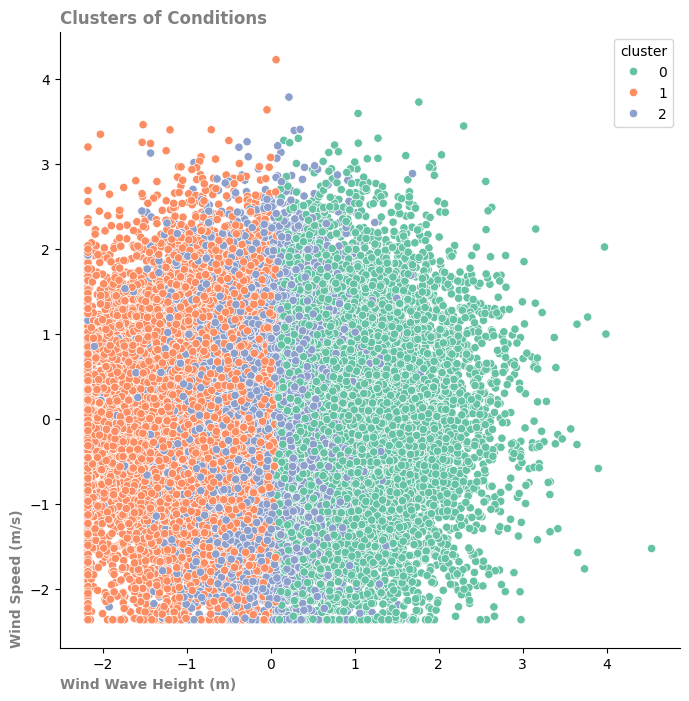

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='wind_wave_height_m', y='wind_speed_m_s', hue='cluster', data=norwegian_scaled, palette='Set2')
ax.set_xlabel('Wind Wave Height (m)', color='gray', loc = 'left', weight='bold', fontsize=10)
ax.set_ylabel('Wind Speed (m/s)', color = 'gray', loc = 'bottom', weight='bold', fontsize=10)
ax.set_title('Clusters of Conditions', color = 'gray', loc = 'left', weight='bold')
ax.spines[['top', 'right']].set_visible(False)
fig.savefig("../figures/Clusters of Conditions.png", dpi=300)
plt.show()

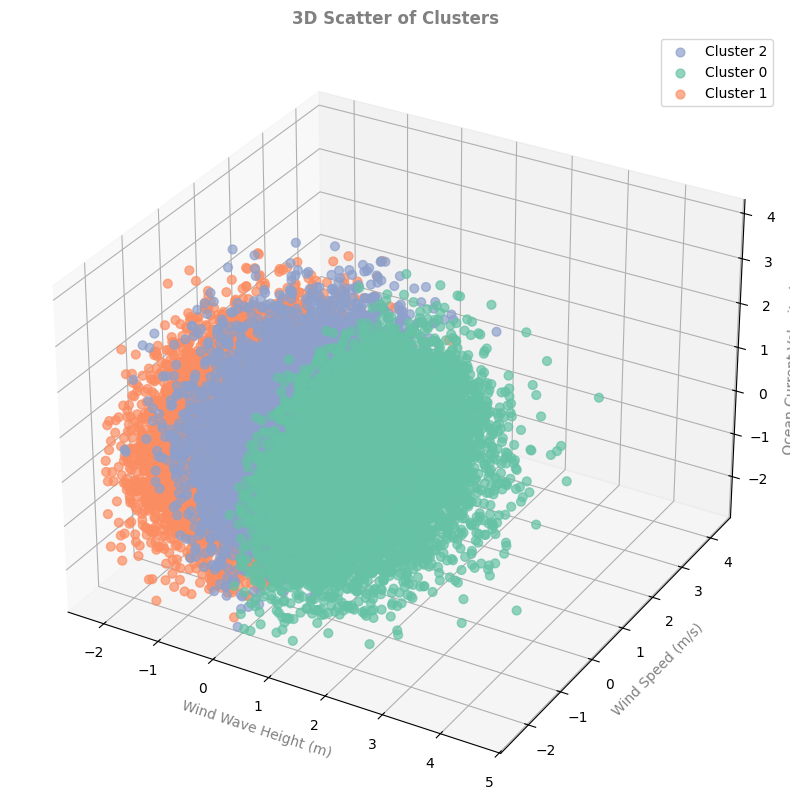

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

colors = sns.color_palette('Set2', n_colors=3)

for cluster in norwegian_scaled['cluster'].unique():
    cluster_data = norwegian_scaled[norwegian_scaled['cluster'] == cluster]
    ax.scatter(
        cluster_data['wind_wave_height_m'],
        cluster_data['wind_speed_m_s'],
        cluster_data['ocean_current_velocity_m_s'],
        color=colors[cluster],
        label=f'Cluster {cluster}',
        s=40,
        alpha=0.7
    )

ax.set_xlabel('Wind Wave Height (m)', color='gray', fontsize=10)
ax.set_ylabel('Wind Speed (m/s)', color='gray', fontsize=10)
ax.set_zlabel('Ocean Current Velocity (m/s)', color='gray', fontsize=10)
ax.set_title('3D Scatter of Clusters', color = 'gray', weight = 'bold')
ax.legend()
fig.savefig("../figures/3D Scatter of Clusters.png", dpi=300)
plt.show()

In [58]:
norwegian_scaled.groupby('cluster')[features].mean()

,wind_wave_height_m,swell_wave_height_m,wind_speed_m_s,ocean_current_velocity_m_s,wave_period_s
cluster,,,,,
0,1.001703,1.001703,0.010861,-0.126545,-0.300013
1,-0.916109,-0.916109,0.020522,-0.157288,-0.467164
2,-0.084979,-0.084979,-0.037277,0.336657,0.910678


bjective: Identify environmental patterns in marine data and examine relationships between wave height, wind, current, and wave period.

Features used:

Wave heights: wind_wave_height_m and swell_wave_height_m

Wind: wind_speed_m_s

Current: ocean_current_velocity_m_s

Wave period: wave_period_s

Standardization: Features were standardized using StandardScaler (mean=0, std=1).

Clustering: K-Means with 3 clusters applied on standardized data.

Cluster results:

Cluster 0: High waves, low/medium wind, slightly lower current and wave period

Cluster 1: Low waves, low/medium wind, short current and wave period

Cluster 2: Medium waves, high current, long wave period, slightly lower wind

Insights: Wave heights are the dominant factor in clusters; other features have secondary influence.

Practical use:

Clusters help identify hidden environmental patterns.

For predicting wave_height_m, only the two wave height features are sufficient.

The 2D scatterplot is only for visual representation of clusters

R²: -0.086
RMSE: 1.030

Feature Importances:
ocean_current_velocity_m_s    0.335723
wind_speed_m_s                0.335119
wave_period_s                 0.329157
dtype: float64


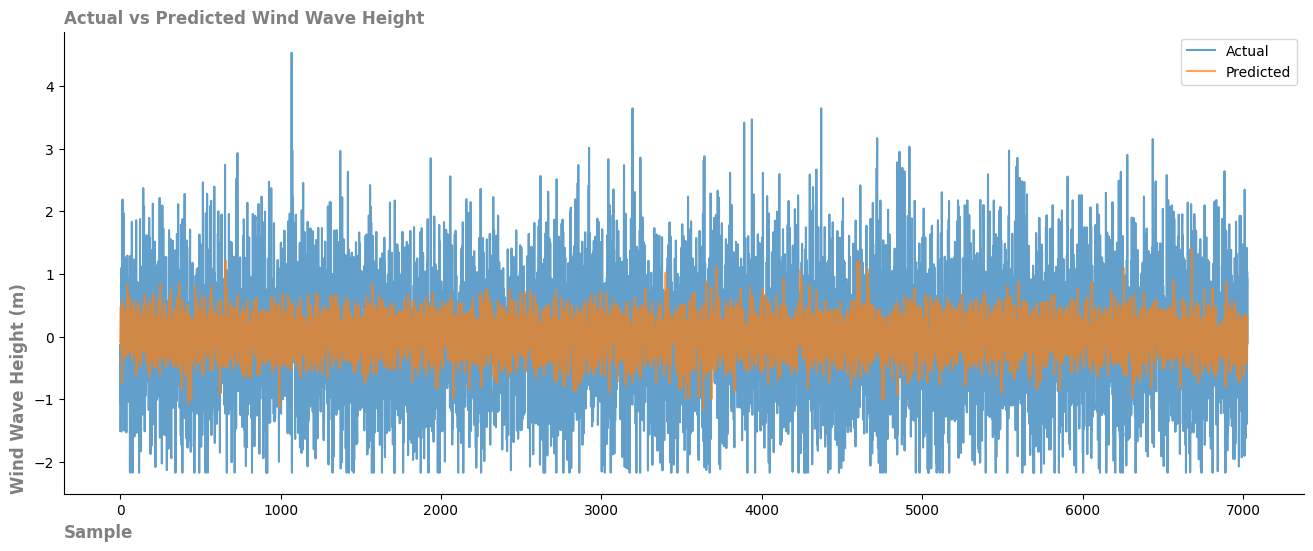

C:\Users\Admin\AppData\Local\Temp\ipykernel_12852\1975958691.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.index, y=feat_importances.values, palette='viridis', ax=ax)


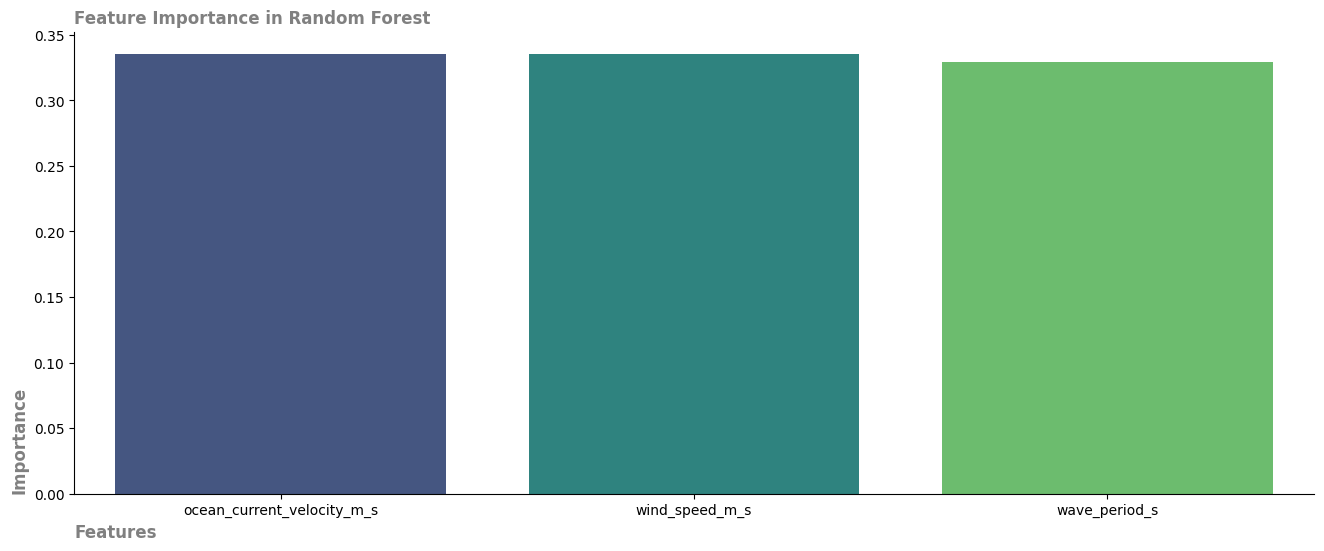

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
features = ['wind_speed_m_s','ocean_current_velocity_m_s','wave_period_s']
X = norwegian_scaled[features]  
y = norwegian_scaled['wind_wave_height_m']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


r2 = r2_score(y_test, y_pred)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")


feat_importances = pd.Series(rf_model.feature_importances_, index=features)
feat_importances.sort_values(ascending=False, inplace=True)

print("\nFeature Importances:")
print(feat_importances)

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(y_test.values, label='Actual', alpha=0.7)
ax.plot(y_pred, label='Predicted', alpha=0.7)
ax.set_title('Actual vs Predicted Wind Wave Height', loc='left', color='gray', weight='bold')
ax.set_xlabel('Sample', loc='left', color='gray', weight='bold', fontsize=12)
ax.set_ylabel('Wind Wave Height (m)', loc='bottom', color='gray', weight='bold', fontsize=12)
ax.spines[['top','right']].set_visible(False)
ax.legend()
plt.show()


fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x=feat_importances.index, y=feat_importances.values, palette='viridis', ax=ax)
ax.set_title('Feature Importance in Random Forest', loc='left', color='gray', weight='bold')
ax.set_xlabel('Features', loc='left', color='gray', weight='bold', fontsize=12)
ax.set_ylabel('Importance', loc='bottom', color='gray', weight='bold', fontsize=12)
ax.spines[['top','right']].set_visible(False)
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

y = norwegian['wave_height_m']
X = norwegian.drop(columns=['time', 'wave_height_m'])

X = pd.get_dummies(X, drop_first=True)


X = X.dropna()
y = y.loc[X.index]

mi = mutual_info_regression(X, y, random_state=42)

mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores)

wind_wave_height_m            9.129416
swell_wave_height_m           9.128971
wind_speed_lag1               0.004912
wave_period_s                 0.002907
season_Summer                 0.002801
wind_wave_height_lag1         0.000759
wind_speed_m_s                0.000685
wind_direction_deg            0.000511
day                           0.000390
sea_surface_temperature_C     0.000000
ocean_current_velocity_m_s    0.000000
wind_height_m                 0.000000
wave_direction_deg            0.000000
month                         0.000000
season_Spring                 0.000000
season_Winter                 0.000000
dtype: float64


Objective: Predict wind_wave_height_m using wind, current, and wave period.

Features: wind_speed_m_s, ocean_current_velocity_m_s, wave_period_s

Method: Random Forest Regression with 100 trees; 20% test split

Model results:

R² = -0.086 → model cannot make meaningful predictions

RMSE = 1.03 → relatively high prediction error

Feature Importance:

All features roughly equal (~0.33), but importance is not meaningful due to poor model performance

Scientific insight:

None of the environmental features (wind, current, wave period) can predict wave height effectively

Using complex ML models on these features does not improve prediction

Key message for presentation:

Wave height varies independently of these environmental features

ML analysis may help explore non-linear patterns, but not for accurate prediction

In [86]:
# Creating a small sample dataset

sample_data = pd.DataFrame({
    'time': pd.date_range(start='2025-01-01', periods=10, freq='D'),
    'wind_wave_height_m': np.random.rand(10),
    'swell_wave_height_m': np.random.rand(10),
    'wind_speed_m_s': np.random.rand(10),
    'ocean_current_velocity_m_s': np.random.rand(10),
    'wave_period_s': np.random.rand(10)
})


sample_data.to_csv("../data/sample_norwegian.csv", index=False)